In [30]:
import pyvinecopulib as pv
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as scs
from statsmodels.distributions.empirical_distribution import ECDF as fit_ecdf
import seaborn as sns
from tqdm import tqdm

# Empirical investigation of classifier equivalences

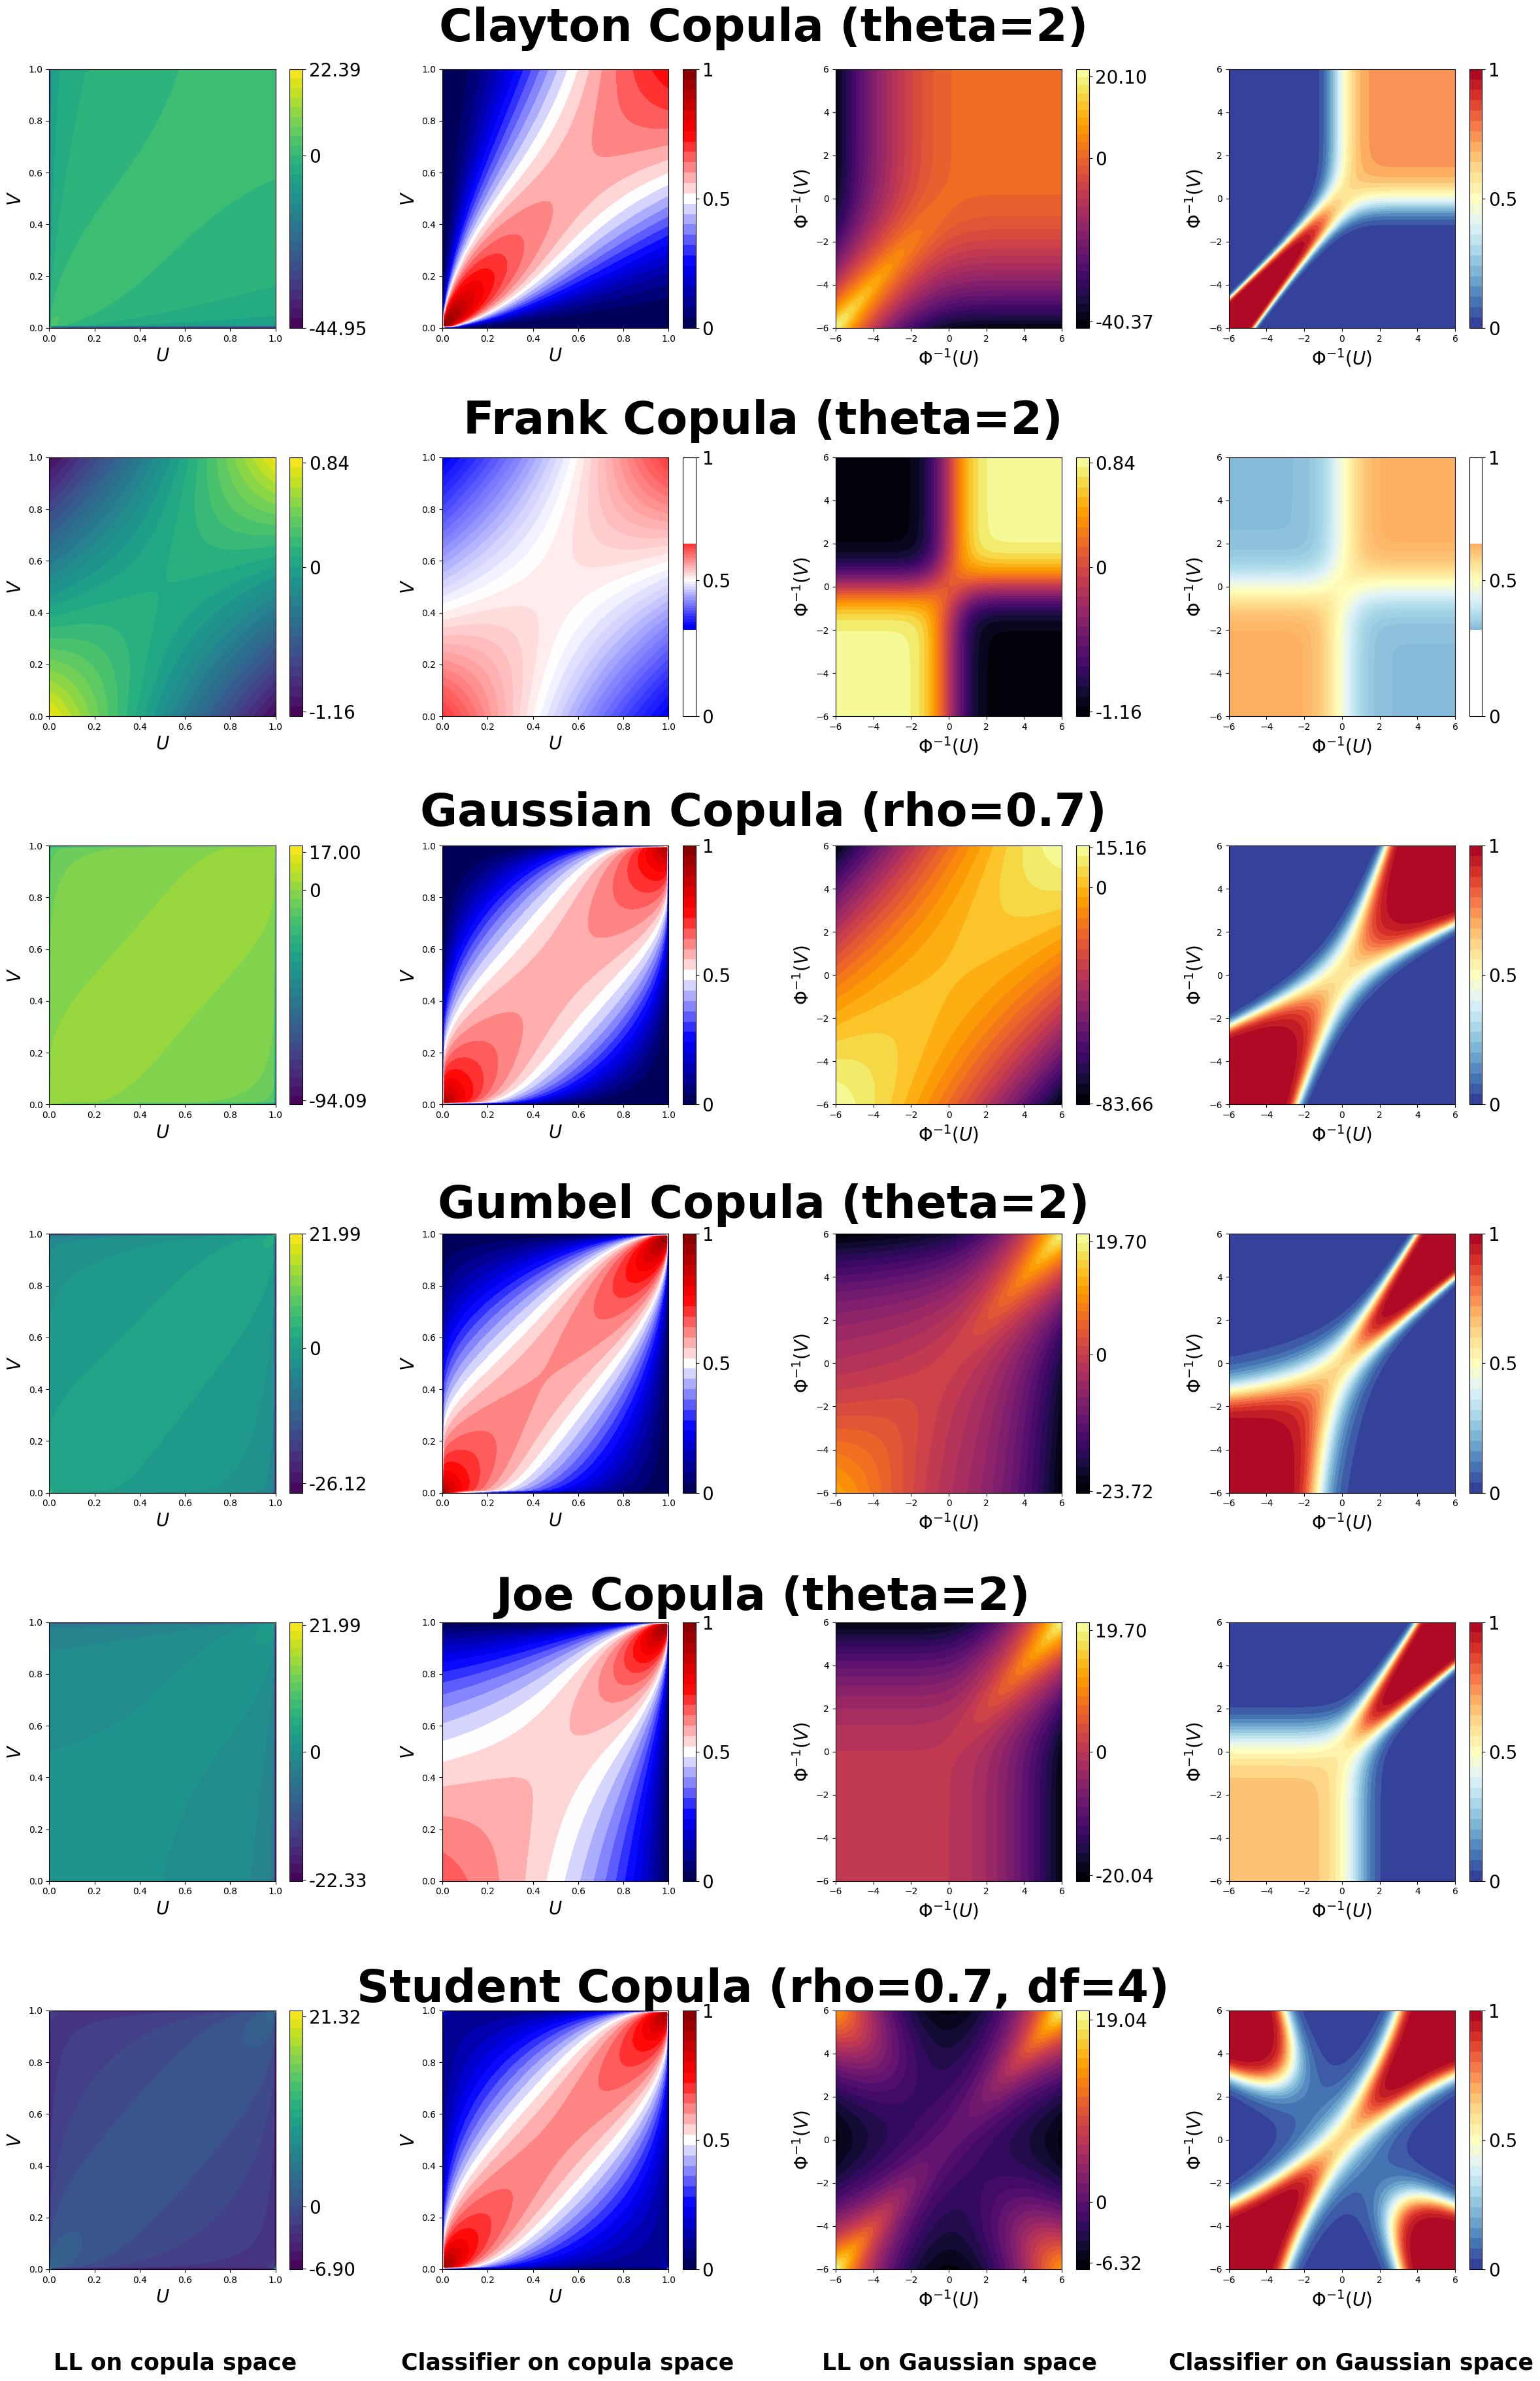

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyvinecopulib as pv
import scipy.stats as scs

# Define the list of copulas
copulas = [
    pv.Bicop(family=pv.BicopFamily.clayton, rotation=0, parameters=[2]),
    pv.Bicop(family=pv.BicopFamily.frank, rotation=0, parameters=[2]),
    pv.Bicop(family=pv.BicopFamily.gaussian, rotation=0, parameters=[0.7]),
    pv.Bicop(family=pv.BicopFamily.gumbel, rotation=0, parameters=[2]),
    pv.Bicop(family=pv.BicopFamily.joe, rotation=0, parameters=[2]),
    pv.Bicop(family=pv.BicopFamily.student, rotation=0, parameters=[0.7, 4]),
]

# Define the titles for the plots
titles_ = [
    'Clayton Copula (theta=2)',
    'Frank Copula (theta=2)',
    'Gaussian Copula (rho=0.7)',
    'Gumbel Copula (theta=2)',
    'Joe Copula (theta=2)',
    'Student Copula (rho=0.7, df=4)'
]

# Create the grid
grid_size = 100
u = np.linspace(0, 1, grid_size)
v = np.linspace(0, 1, grid_size)
z1 = np.linspace(-6, 6, grid_size)
z2 = np.linspace(-6, 6, grid_size)

U, V = np.meshgrid(u, v)
Z1, Z2 = np.meshgrid(z1, z2)
points = np.column_stack([U.ravel(), V.ravel()])
points_z = np.column_stack([Z1.ravel(), Z2.ravel()])
# Create the subplot
num_copulas = len(copulas)
fig, axes = plt.subplots(num_copulas, 4, figsize=(24, 6 * num_copulas))

ticks_size = 20
u_v_size = 20

for i, (cop, title) in enumerate(zip(copulas, titles_)):
    # Compute the PDF values
    cop_pdf = np.log(cop.pdf(points).reshape(grid_size, grid_size))
    cop_pdf_z = np.log(cop.pdf(scs.norm.cdf(points_z)).reshape(grid_size, grid_size))
    
    
    # Plot the contour plot
    contour = axes[i, 0].contourf(U, V, cop_pdf, levels=30, cmap='viridis')
    cbar = fig.colorbar(contour, ax=axes[i, 0])
    cbar.ax.tick_params(labelsize=ticks_size)
    cbar.set_ticks([cop_pdf.min(), 0, cop_pdf.max()])
    cbar.set_ticklabels([f'{cop_pdf.min():.2f}', '0', f'{cop_pdf.max():.2f}'])
    axes[i, 0].set_xlabel(r'$U$', fontsize=u_v_size)
    axes[i, 0].set_ylabel(r'$V$', fontsize=u_v_size)
    
    # Compute the transformed PDF values
    cop_classifier = np.exp(cop_pdf) / (1 + np.exp(cop_pdf))
    
    # Plot the transformed contour plot with fixed color scale
    contour_r = axes[i, 1].contourf(U, V, cop_classifier, levels=30, cmap='seismic', vmin=0, vmax=1)
    cbar_r = fig.colorbar(contour_r, ax=axes[i, 1])
    cbar_r.ax.tick_params(labelsize=ticks_size)
    cbar_r.set_ticks([0, 0.5, 1])
    cbar_r.set_ticklabels(['0', '0.5', '1'])
    axes[i, 1].set_xlabel(r'$U$', fontsize=u_v_size)
    axes[i, 1].set_ylabel(r'$V$', fontsize=u_v_size)

    # Plot the logpdf on Gaussian space
    contour_z = axes[i, 2].contourf(Z1, Z2, cop_pdf_z, levels=30, cmap='inferno')
    cbar_z = fig.colorbar(contour_z, ax=axes[i, 2])
    cbar_z.ax.tick_params(labelsize=ticks_size)
    cbar_z.set_ticks([cop_pdf_z.min(), 0, cop_pdf_z.max()])
    cbar_z.set_ticklabels([f'{cop_pdf_z.min():.2f}', '0', f'{cop_pdf_z.max():.2f}'])
    axes[i, 2].set_xlabel(r'$\Phi^{-1}(U)$', fontsize=u_v_size)
    axes[i, 2].set_ylabel(r'$\Phi^{-1}(V)$', fontsize=u_v_size)

    # Plot the classifier on Gaussian space with fixed color scale
    cop_classifier_z = np.exp(cop_pdf_z) / (1 + np.exp(cop_pdf_z))
    contour_z_r = axes[i, 3].contourf(Z1, Z2, cop_classifier_z, levels=30, cmap='RdYlBu_r', vmin=0, vmax=1)
    cbar_z_r = fig.colorbar(contour_z_r, ax=axes[i, 3])
    cbar_z_r.ax.tick_params(labelsize=ticks_size)
    cbar_z_r.set_ticks([0, 0.5, 1])
    cbar_z_r.set_ticklabels(['0', '0.5', '1'])
    axes[i, 3].set_xlabel(r'$\Phi^{-1}(U)$', fontsize=u_v_size)
    axes[i, 3].set_ylabel(r'$\Phi^{-1}(V)$', fontsize=u_v_size)

    # Add the copula name in the middle of the 4 subplots
    fig.text(0.5, 1.0025 - (i ) / num_copulas, title, ha='center', va='center', fontsize=50, weight='bold')

# Add column titles at the bottom
fig.text(0.125, 0.01, 'LL on copula space', ha='center', va='center', fontsize=25, weight='bold')
fig.text(0.375, 0.01, 'Classifier on copula space', ha='center', va='center', fontsize=25, weight='bold')
fig.text(0.625, 0.01, 'LL on Gaussian space', ha='center', va='center', fontsize=25, weight='bold')
fig.text(0.875, 0.01, 'Classifier on Gaussian space', ha='center', va='center', fontsize=25, weight='bold')

# Adjust layout to add vertical space between rows
plt.tight_layout(pad=3.0)
fig.subplots_adjust(hspace=0.5, bottom=0.05)

plt.show()

# Utilising other DRE losses for better tail modelling

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Ratio(nn.Module):
    """
    Simple MLP classifier for the ratio p/q.

    Args:
        h_dim (int): hidden dimension
        in_dim (int): input dimension
        h_layers (int): number of hidden layers
    """
    def __init__(self, h_dim=100, in_dim=2, h_layers=2, normalising_cst = False, c = 1.0):
        super(Ratio, self).__init__()

        self.h_dim = h_dim
        self.in_dim = in_dim
        self.h_layers = h_layers
        self.normalising_cst = normalising_cst
        if self.normalising_cst:
            self.c = nn.Parameter(torch.tensor(c))

        self.fc_in = nn.Linear(self.in_dim, self.h_dim)
        self.fc_hidden = nn.Linear(self.h_dim, self.h_dim)
        self.fc_out = nn.Linear(self.h_dim, 1)

    def forward(self, x):
        '''
        Returns p/q, a positive scalar. Computed as exp(NN) where NN is the output of a MLP classifier.
        '''

        x = F.relu(self.fc_in(x)) 

        for l in range(self.h_layers):
            x = F.relu(self.fc_hidden(x)) + x

        logits = self.fc_out(x).exp()

        if self.normalising_cst:
            logits = logits * self.c

        return logits


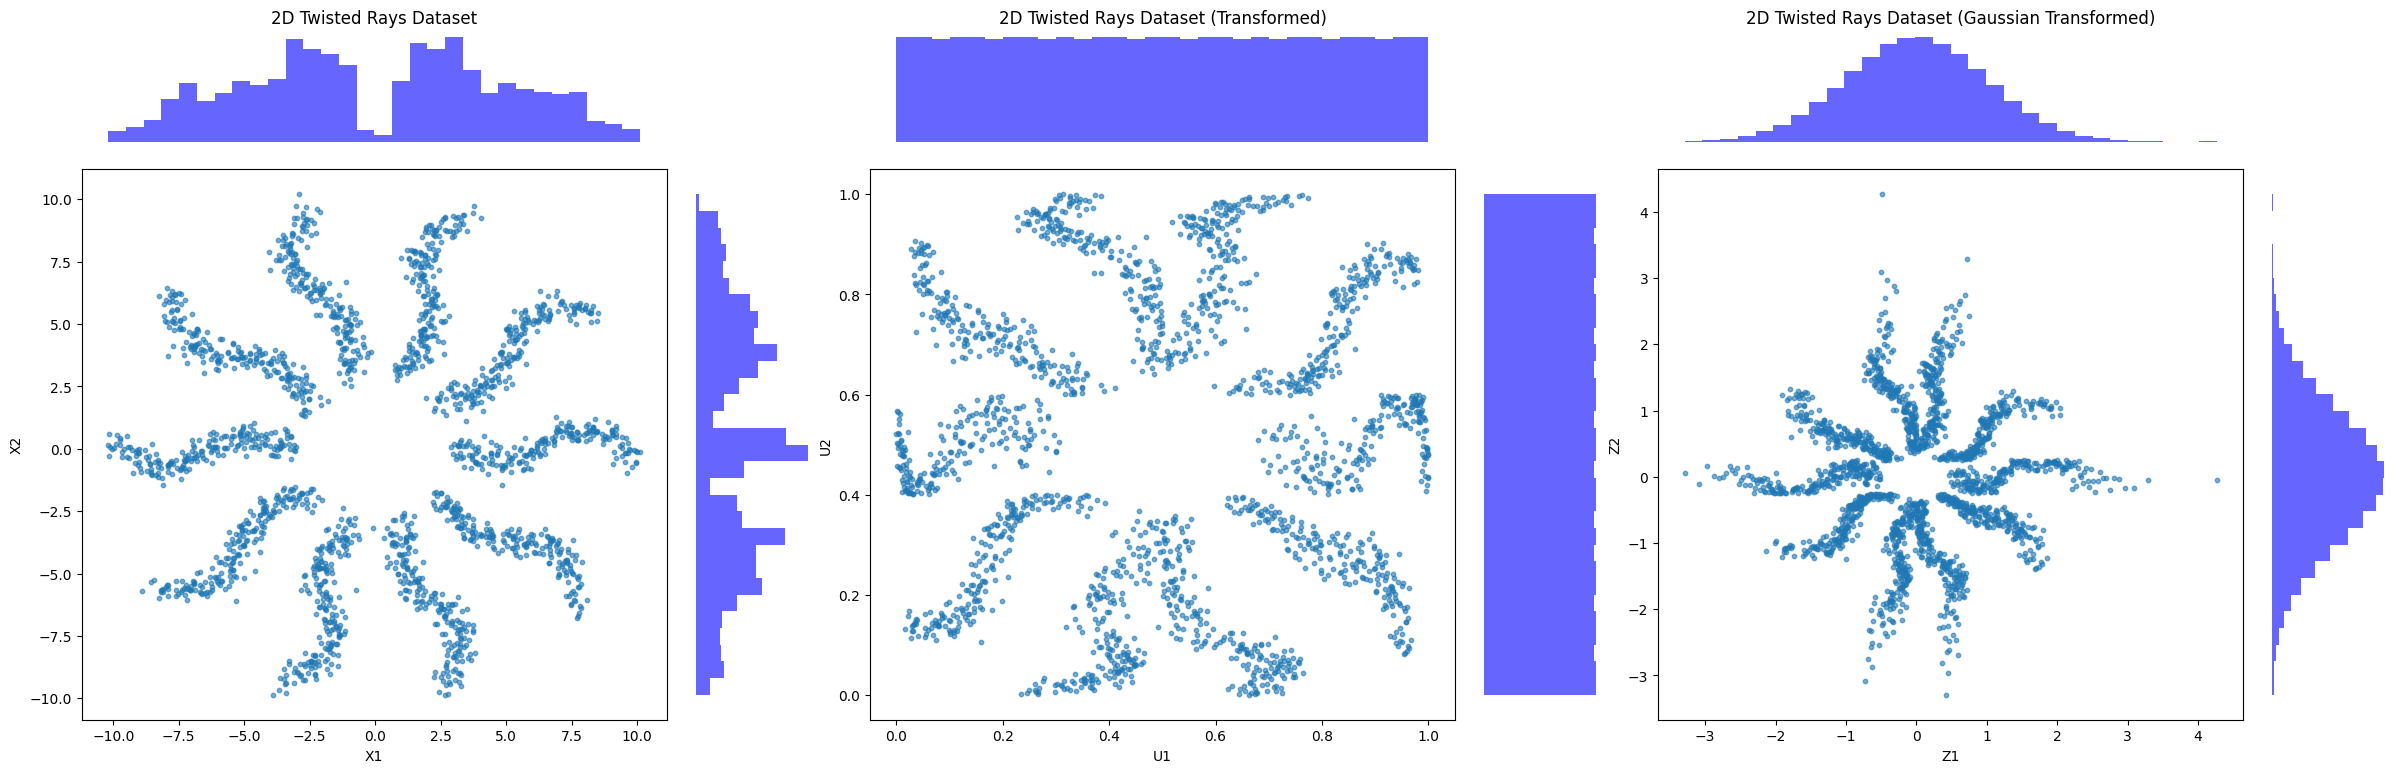

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

def generate_twisted_rays_dataset(n_samples_per_ray=200, n_rays=10, length=10, noise=0.3, twist_factor=0.1, random_state=42):
    np.random.seed(random_state)
    
    data = []
    angles = np.linspace(0, 2 * np.pi, n_rays, endpoint=False)
    
    for angle in angles:
        r = np.linspace(3, length, n_samples_per_ray)
        twist = twist_factor * np.sin(r)  # Add a twist to the rays
        x = r * np.cos(angle + twist) + np.random.normal(0, noise, n_samples_per_ray)
        y = r * np.sin(angle + twist) + np.random.normal(0, noise, n_samples_per_ray)
        data.append(np.vstack((x, y)).T)
    
    data = np.vstack(data)
    return data

def fit_ecdf(data):
    """Fit an empirical CDF to the data."""
    sorted_data = np.sort(data)
    n = len(data)
    ecdf = lambda x: np.searchsorted(sorted_data, x, side='right') / n
    return ecdf

# Generate the dataset
data = generate_twisted_rays_dataset()
data = data[np.random.choice(data.shape[0], data.shape[0], replace=False)]

# Compute the ECDFs and transform the data
cdf1 = fit_ecdf(data[:, 0])
cdf2 = fit_ecdf(data[:, 1])
data_u1 = cdf1(data[:, 0])
data_u2 = cdf2(data[:, 1])
data_u = np.column_stack([data_u1, data_u2])
data_u = np.clip(data_u, 1e-5, 1 - 1e-5)
data_u = data_u[np.random.choice(data_u.shape[0], data_u.shape[0], replace=False)]
data_z = scs.norm.ppf(data_u)
data_z = data_z[np.random.choice(data_z.shape[0], data_z.shape[0], replace=False)]

# Create a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

def add_marginal_histograms(ax, x, y):
    """Add marginal histograms to the scatter plot."""
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)
    
    ax_histx.hist(x, bins=30, color='blue', alpha=0.6)
    ax_histy.hist(y, bins=30, color='blue', alpha=0.6, orientation='horizontal')
    
    ax_histx.axis('off')
    ax_histy.axis('off')

# Plot the original dataset with marginal histograms
axes[0].scatter(data[:, 0], data[:, 1], s=10, alpha=0.6)
add_marginal_histograms(axes[0], data[:, 0], data[:, 1])
axes[0].set_title('2D Twisted Rays Dataset')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')

# Plot the transformed dataset (data_u) with marginal histograms
axes[1].scatter(data_u[:, 0], data_u[:, 1], s=10, alpha=0.6)
add_marginal_histograms(axes[1], data_u[:, 0], data_u[:, 1])
axes[1].set_title('2D Twisted Rays Dataset (Transformed)')
axes[1].set_xlabel('U1')
axes[1].set_ylabel('U2')

# Plot the transformed dataset (data_z) with marginal histograms
axes[2].scatter(data_z[:, 0], data_z[:, 1], s=10, alpha=0.6)
add_marginal_histograms(axes[2], data_z[:, 0], data_z[:, 1])
axes[2].set_title('2D Twisted Rays Dataset (Gaussian Transformed)')
axes[2].set_xlabel('Z1')
axes[2].set_ylabel('Z2')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

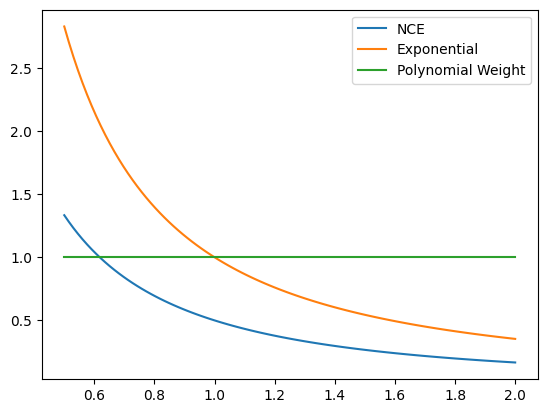

In [ ]:
def loss_nce(r_p, r_q,p_size, q_size):
    '''Weight w(c)=1/(c^2 + c)'''
    v = q_size / p_size
    return (-(r_p /(v+r_p)).log()).mean() - v* ((v/(v+r_q)).log().mean()) 

def loss_exponential(r_p,r_q):
    '''Weight w(c)=1/c^(3/2)'''
    c_p = r_p/(1+r_p)
    c_p = 2*c_p-1
    c_q = r_q/(1+r_q)
    c_q = 2*c_q-1
    return ((-c_p).exp() + c_q.exp()).mean()

def loss_LSIF(r_p, r_q):
    '''Weight w(c)=1'''
    c_p = r_p/(1+r_p)
    c_p = 2*c_p-1
    c_q = r_q/(1+r_q)
    c_q = 2*c_q-1
    #return (-c_p +0.5*c_q**2).mean()
    return (-r_p +0.5*r_q**2).mean()

def loss_KLIEP(r_p, r_q):
    '''Weight w(c)=1/c'''
    c_p = r_p/(1+r_p)
    c_p = 2*c_p-1
    c_q = r_q/(1+r_q)
    c_q = 2*c_q-1
    return ((-c_p).log()).mean()

#def loss_exponential_weight(r_p,r_q):
    #'''Weight w(c)=exp^(2c)'''
    #c_p = r_p/(1+r_p)
    #c_p = 2*c_p-1
    #c_q = r_q/(1+r_q)
    #c_q = 2*c_q-1
    #return (-c_p + (0.5*c_q* ((2*c_q).log()-1) )).mean()
    #return (-c_p + (0.5*c_q* ((2*torch.max(c_q,(torch.tensor(1e-10,dtype=torch.float32)))).log()-1) )).mean()
    #return (-r_p + (0.5*r_q* ((2*torch.max(r_q,(torch.tensor(1e-10,dtype=torch.float32)))).log()-1) )).mean()

'''def loss_exponential_weight(r_p,r_q):
    Weight w(c)=exp^(2c
    #c_p = r_p/(1+r_p)
    #c_p = 2*c_p-1
    #c_q = r_q/(1+r_q)
    #c_q = 2*c_q-1
    #return (-c_p + (0.5*c_q* ((2*c_q).log()-1) )).mean()
    return (-r_p + (0.5*r_q* ((2*r_q).log()-1) )).mean()

def loss_poly_weight(r_p,r_q):
    Weight w(c)=1 i.e. k=0
       or w(c)=c^2 i.e. k=1
    c_p = r_p/(1+r_p)
    c_p = 2*c_p-1
    c_q = r_q/(1+r_q)
    c_q = 2*c_q-1
    #print(c_p.mean(), c_q.mean())
    return ((-c_p) + ( (c_q)**(2)) /(2)).mean()
    #return ((-c_p) + ( (2*c_q)**(3/2)) /(3)).mean()'''

c_vals = np.linspace(0.5, 2, 100)

plt.plot(c_vals, (1/(c_vals**2 + c_vals)), label='NCE')
plt.plot(c_vals, (1/c_vals**(3/2)), label='Exponential')
plt.plot(c_vals, (c_vals**0), label='Polynomial Weight')
plt.legend()

In [405]:
#ratio_copula = Ratio(h_dim=100, in_dim=2, h_layers=5, normalising_cst = True, c = 1.0)
data_z = torch.tensor(data_z, dtype=torch.float32)

loss_hist = []
max_grad_norm = 0.01 

optimizer = torch.optim.Adam(ratio_copula.parameters(), lr=0.00003, weight_decay=0.00005)
for epoch in tqdm(range(12500)):
    optimizer.zero_grad()
    r_p = ratio_copula(torch.tensor(data_z).float())
    r_q = ratio_copula(torch.tensor(scs.norm.rvs(size=(data_z.shape[0],data_z.shape[1]))).float())
    #loss = loss_nce(r_p, r_q, data_z.shape[0], data_z.shape[0]) #lr=0.003, weight_decay=0.00005 12500iter
    #loss = loss_exponential(r_p, r_q) #lr=0.003, weight_decay=0.00005 12500iter
    loss = loss_LSIF(r_p, r_q) # lr=0.00003, weight_decay=0.00005 12500iter
    loss.backward()
    torch.nn.utils.clip_grad_norm_(ratio_copula.parameters(), max_grad_norm)
    loss_hist.append(loss.item())
    optimizer.step()
    if epoch % 100 == 0 and epoch > 0:
        with torch.no_grad():
             print(f'Epoch {epoch}, loss and normalising constant {loss.item()}', ratio_copula.c.item())
plt.plot(loss_hist)

C:\Users\u1819911\AppData\Local\Temp\ipykernel_8284\2888975973.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_z = torch.tensor(data_z, dtype=torch.float32)
  0%|          | 0/12500 [00:00<?, ?it/s]C:\Users\u1819911\AppData\Local\Temp\ipykernel_8284\2888975973.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  r_p = ratio_copula(torch.tensor(data_z).float())
  1%|          | 106/12500 [00:01<02:47, 74.04it/s]

Epoch 100, loss and normalising constant -1.0790846347808838 0.1658281832933426


  2%|▏         | 210/12500 [00:03<02:53, 70.86it/s]

Epoch 200, loss and normalising constant -1.0274806022644043 0.16605602204799652


  2%|▏         | 308/12500 [00:04<02:42, 74.86it/s]

Epoch 300, loss and normalising constant -1.0617867708206177 0.16614855825901031


  3%|▎         | 413/12500 [00:06<02:44, 73.53it/s]

Epoch 400, loss and normalising constant -1.1086575984954834 0.16612543165683746


  4%|▍         | 510/12500 [00:07<02:39, 75.39it/s]

Epoch 500, loss and normalising constant -1.0443105697631836 0.1660405844449997


  5%|▍         | 614/12500 [00:08<02:46, 71.45it/s]

Epoch 600, loss and normalising constant -1.1452951431274414 0.16596998274326324


  6%|▌         | 715/12500 [00:10<02:29, 79.02it/s]

Epoch 700, loss and normalising constant -1.0410038232803345 0.16582582890987396


  6%|▋         | 812/12500 [00:11<02:28, 78.60it/s]

Epoch 800, loss and normalising constant -0.9949621558189392 0.16566182672977448


  7%|▋         | 904/12500 [00:12<02:45, 69.91it/s]

Epoch 900, loss and normalising constant -1.0082083940505981 0.1655855029821396


  8%|▊         | 1010/12500 [00:14<02:57, 64.60it/s]

Epoch 1000, loss and normalising constant -1.031535029411316 0.16541846096515656


  9%|▉         | 1109/12500 [00:15<03:12, 59.06it/s]

Epoch 1100, loss and normalising constant -1.0419034957885742 0.1652507483959198


 10%|▉         | 1210/12500 [00:17<04:04, 46.21it/s]

Epoch 1200, loss and normalising constant -1.0357667207717896 0.1651020497083664


 10%|█         | 1311/12500 [00:19<03:10, 58.82it/s]

Epoch 1300, loss and normalising constant -1.0539677143096924 0.16490454971790314


 11%|█▏        | 1411/12500 [00:21<03:15, 56.84it/s]

Epoch 1400, loss and normalising constant -0.9984588623046875 0.16477236151695251


 12%|█▏        | 1507/12500 [00:22<03:25, 53.60it/s]

Epoch 1500, loss and normalising constant -0.9704767465591431 0.16456188261508942


 13%|█▎        | 1584/12500 [00:24<02:48, 64.66it/s]


KeyboardInterrupt: 

In [394]:
ratio_copula.c  #0.1658

Parameter containing:
tensor(0.1658, requires_grad=True)

In [397]:
ratio_copula.c

Parameter containing:
tensor(1., requires_grad=True)

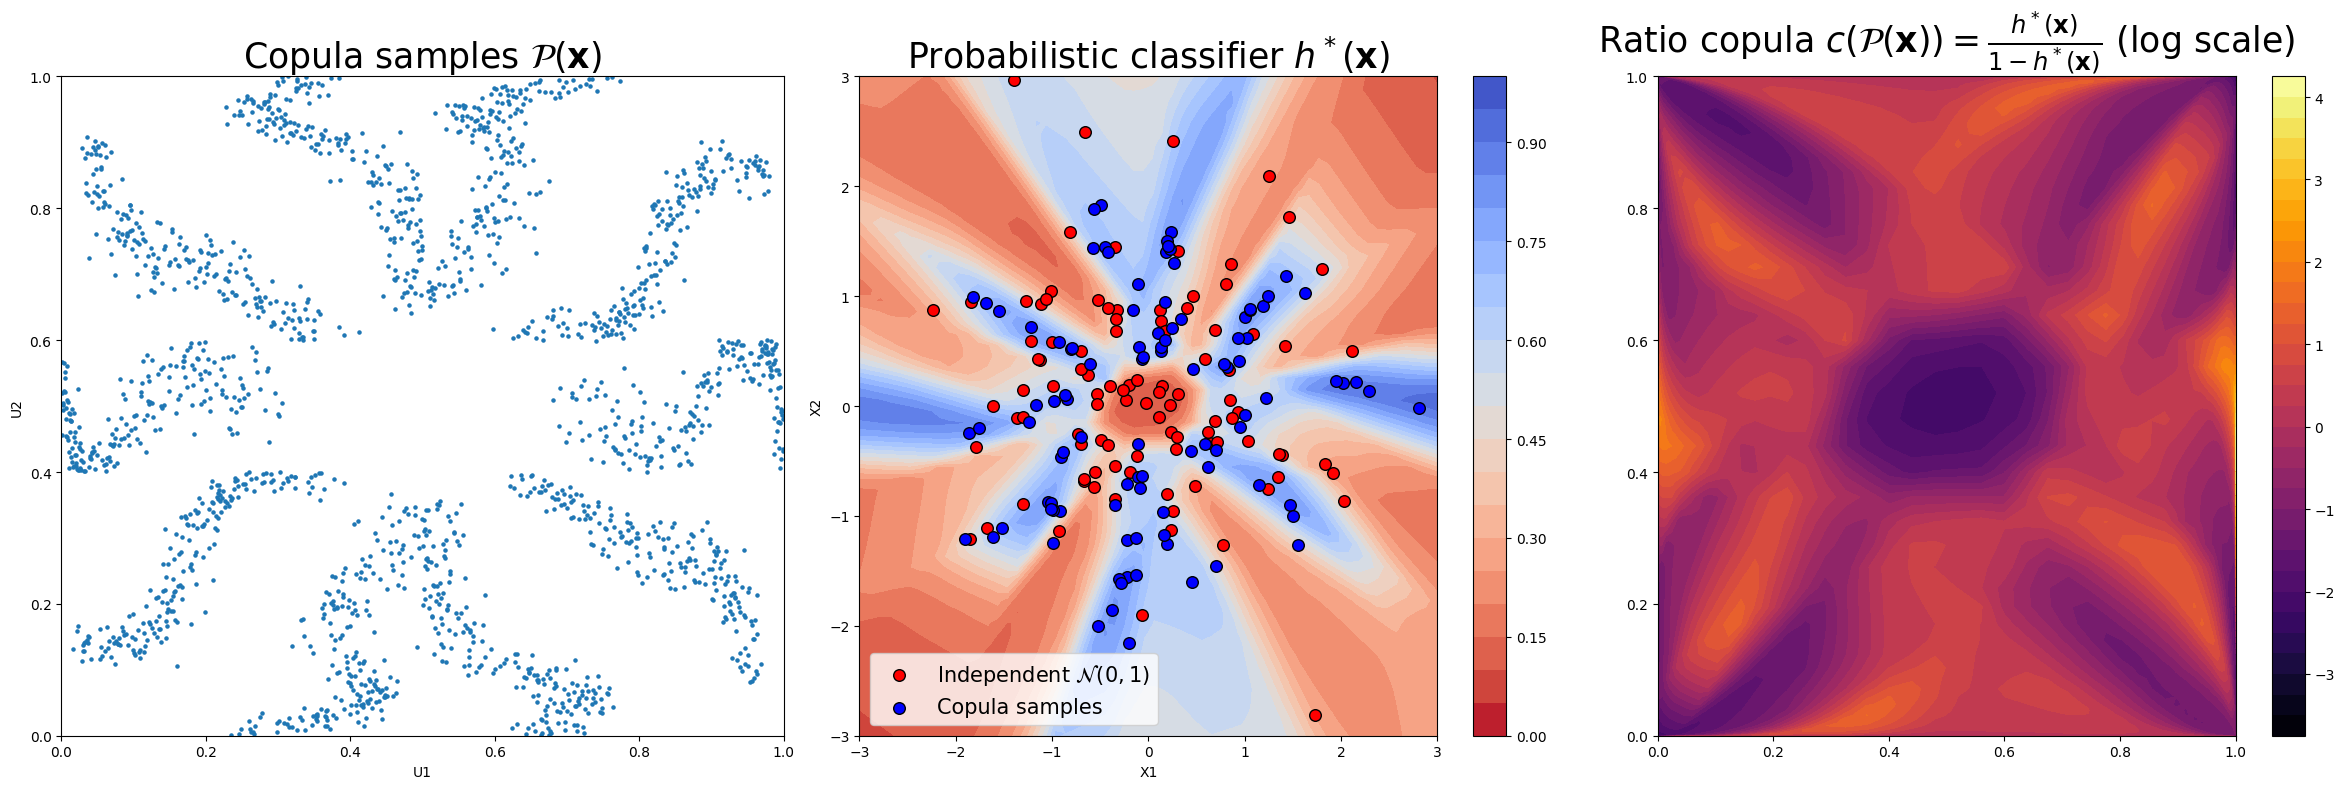

In [436]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import scipy.stats as scs

# Set font size
font_size = 25

# Assuming ratio_copula is already trained
# Create a grid for plotting
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
z = torch.tensor(np.column_stack((x.flatten(), y.flatten())))
gauss = scs.norm.pdf(x) * scs.norm.pdf(y)

# Get the ratio
r = ratio_copula(z.float()).detach().numpy()
Z = np.log(r.reshape(100, 100))
Z_gauss = Z + np.log(gauss)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8), gridspec_kw={'width_ratios': [1, 1, 1]})

# First subplot: scatter plot of data_u
axes[0].scatter(data_u[:5000, 0], data_u[:5000, 1], s=5)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].set_title(r'Copula samples $\mathcal{P}(\mathbf{x})$', fontsize=font_size)
axes[0].set_xlabel('U1')
axes[0].set_ylabel('U2')

# Second subplot: contour plot of r/(1+r) with scatter plots of data_gaussian[:100] and data_z[:100]
r_transformed = r / (1 + r)
Z_classifier = r_transformed.reshape(100, 100)

contour = axes[1].contourf(x, y, Z_classifier, levels=20, cmap='coolwarm_r')
axes[1].scatter(torch.randn(100, 2)[:, 0], torch.randn(100, 2)[:, 1], color='red', edgecolors="k", s=70, label=r'Independent $\mathcal{N}(0,1)$', marker='o')
axes[1].scatter(data_z[:100, 0], data_z[:100, 1], color='blue', s=70, label='Copula samples', edgecolors="k", marker='o')
axes[1].set_xlim(-3, 3)
axes[1].set_ylim(-3, 3)
axes[1].set_title(r'Probabilistic classifier $h^*(\mathbf{x})$', fontsize=font_size)
axes[1].legend(fontsize=15)
fig.colorbar(contour, ax=axes[1])
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')

# Third subplot: ratio model
contour = axes[2].contourf(scs.norm.cdf(x), scs.norm.cdf(y), Z.reshape(100, 100), levels=30, cmap='inferno')
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 1)
axes[2].set_title(r'Ratio copula $c\left(\mathcal{P}(\mathbf{x})\right)=\frac{h^*(\mathbf{x})}{1-h^*(\mathbf{x})}$ (log scale)', fontsize=font_size)
#axes[2].scatter(data_u[:5000, 0], data_u[:5000, 1], s=5, c='blue')
fig.colorbar(contour, ax=axes[2])

plt.tight_layout()  
plt.show()

In [408]:
# save the grids
'''np.save('Z_exp_loss.npy', Z)
np.save('Z_gauss_exp_loss.npy', Z_gauss)'''
'''np.save('Z_nce_loss.npy', Z)
np.save('Z_gauss_nce_loss.npy', Z_gauss)
np.save('Z_LSIF_loss.npy', Z)
np.save('Z_gauss_LSIF_loss.npy', Z_gauss)'''

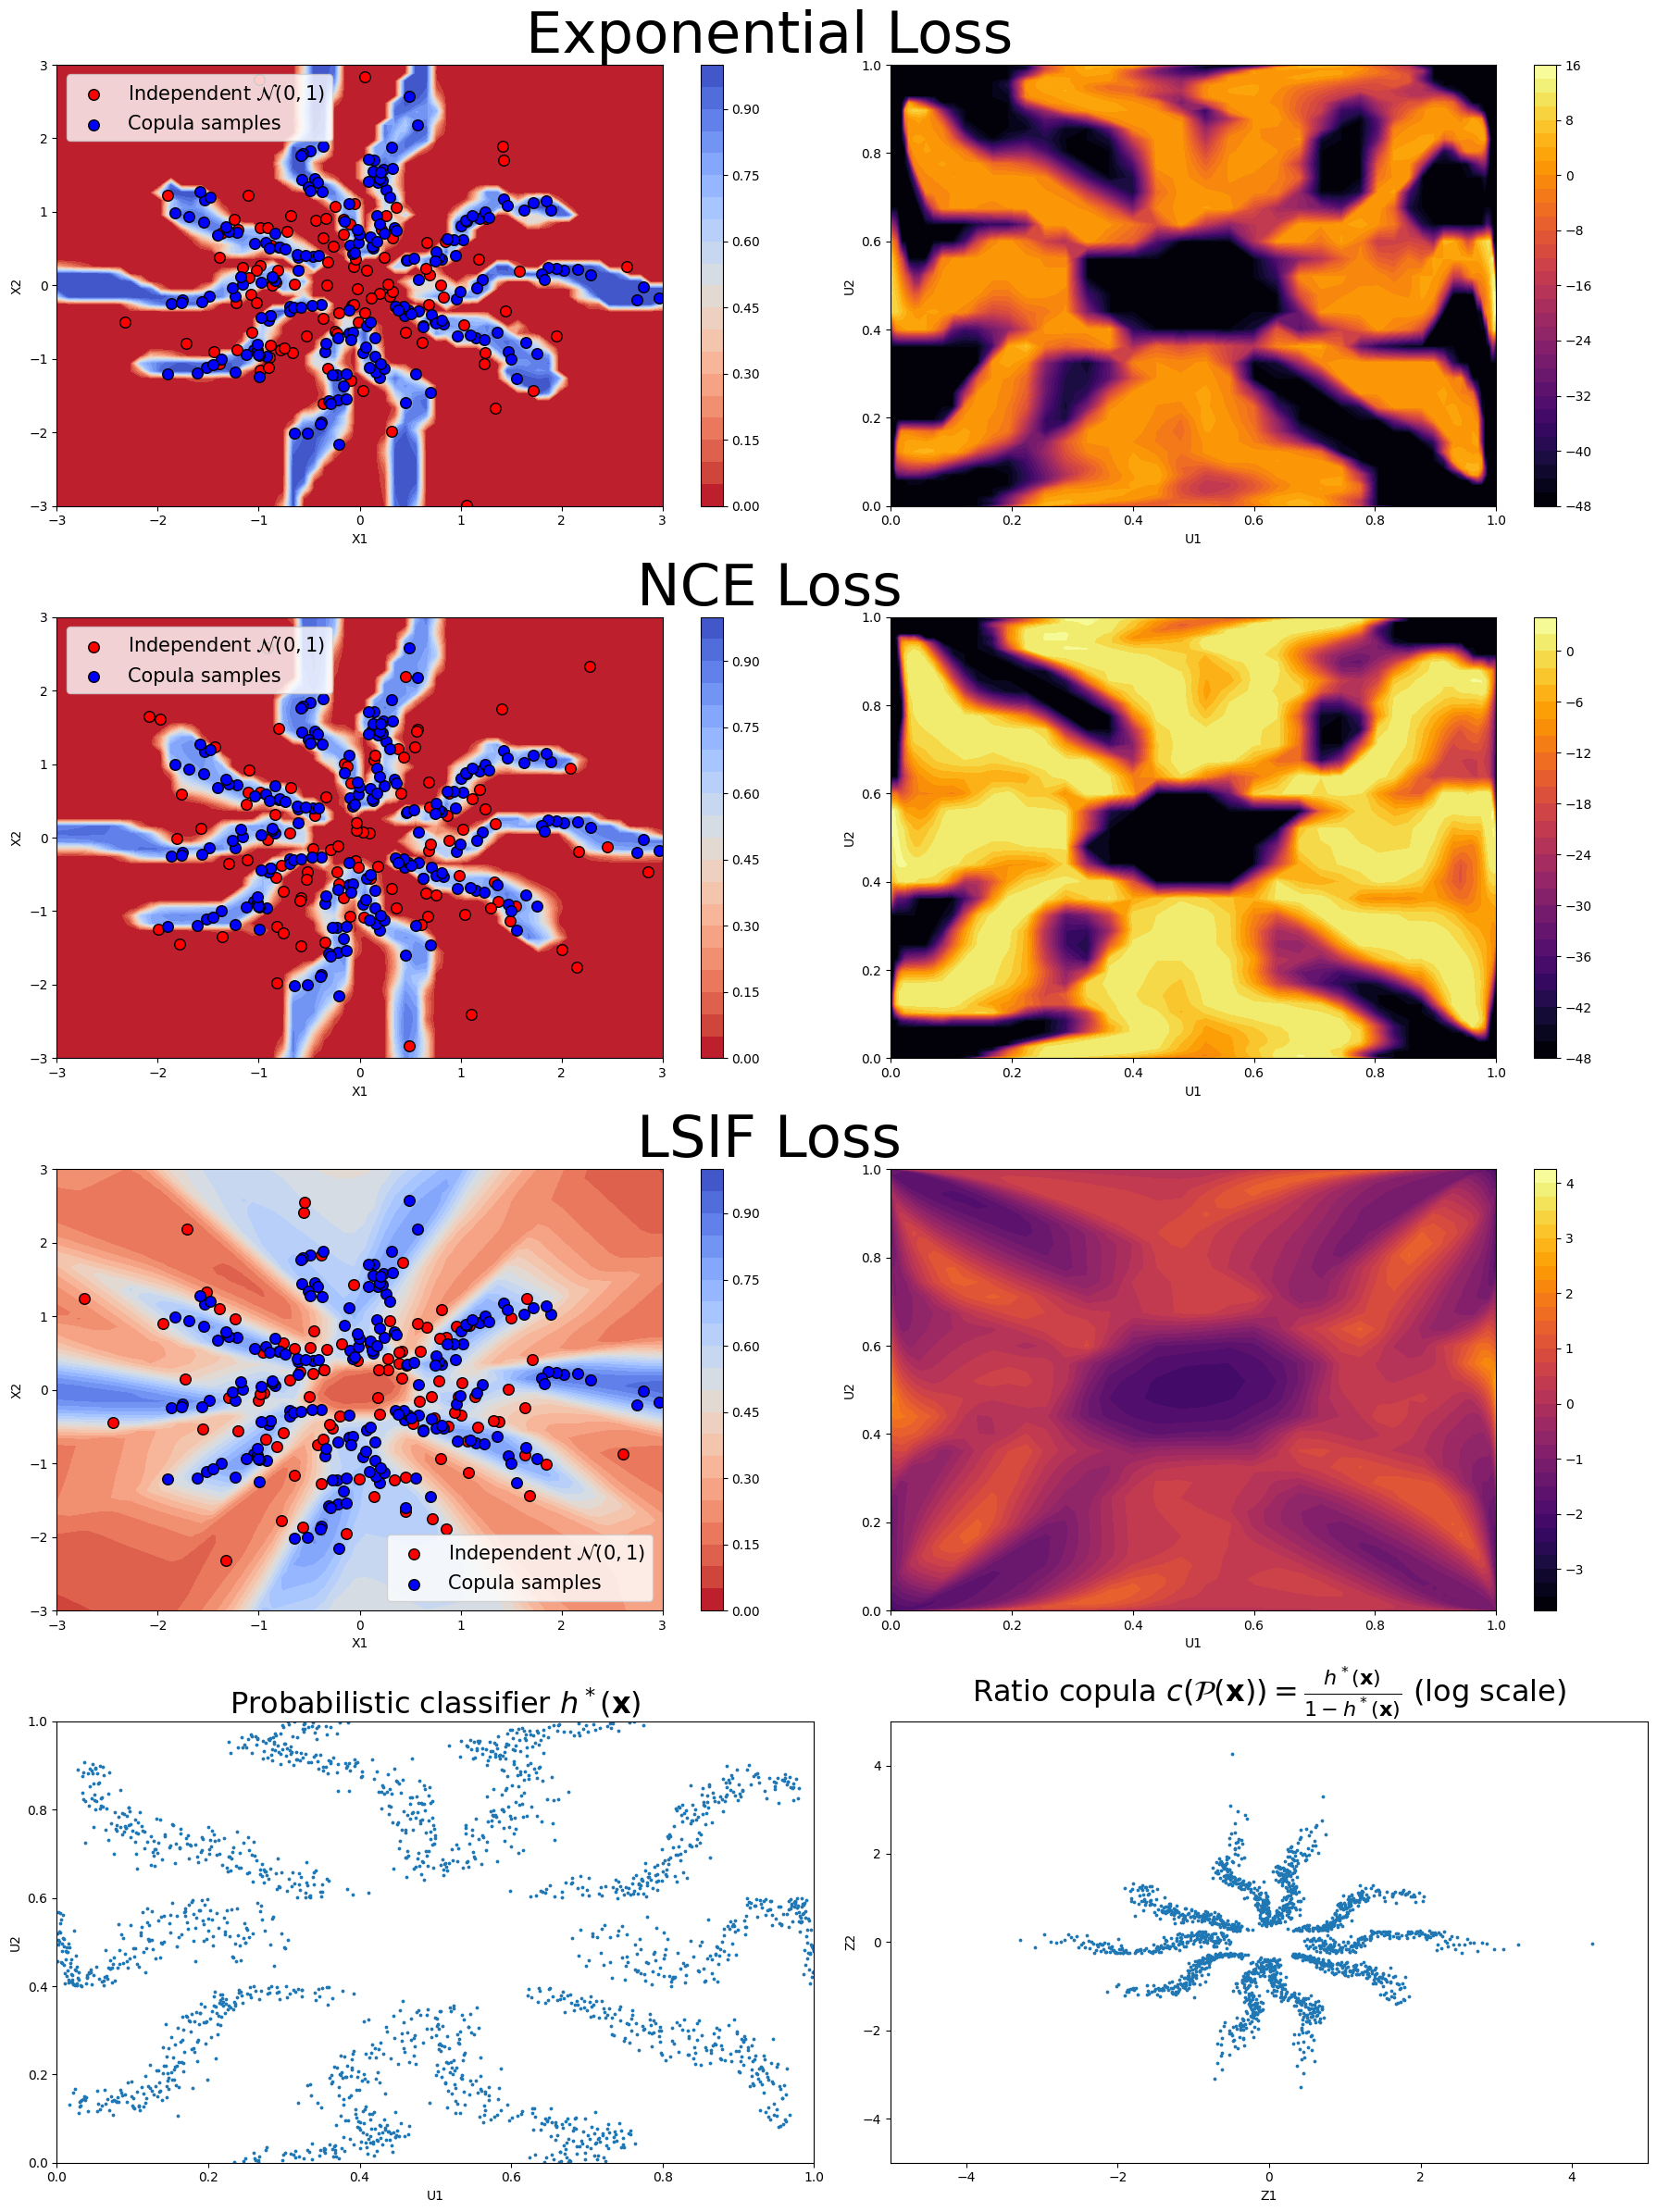

In [479]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import scipy.stats as scs

Z_exp_loss = np.load('Z_exp_loss.npy')
Z_nce_loss = np.load('Z_nce_loss.npy')
Z_LSIF_loss = np.load('Z_LSIF_loss.npy')

# Set font size
font_size = 23

# Create a grid for plotting
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(18, 24), gridspec_kw={'width_ratios': [1, 1]})

# Define the data for each row
data_list = [
    (Z_exp_loss, 'Exponential Loss'),
    (Z_nce_loss, 'NCE Loss'),
    (Z_LSIF_loss, 'LSIF Loss')
]

for i, (Z_loss, title) in enumerate(data_list):
    # Second subplot: contour plot of r/(1+r) with scatter plots of data_gaussian[:100] and data_z[:100]
    r_transformed = np.exp(Z_loss) / (1 + np.exp(Z_loss))
    contour = axes[i, 0].contourf(x, y, r_transformed, levels=20, cmap='coolwarm_r')
    axes[i, 0].scatter(torch.randn(100, 2)[:, 0], torch.randn(100, 2)[:, 1], color='red', edgecolors="k", s=70, label=r'Independent $\mathcal{N}(0,1)$', marker='o')
    axes[i, 0].scatter(data_z[:200, 0], data_z[:200, 1], color='blue', s=70, label='Copula samples', edgecolors="k", marker='o')
    axes[i, 0].set_xlim(-3, 3)
    axes[i, 0].set_ylim(-3, 3)
    axes[i, 0].legend(fontsize=15)
    fig.colorbar(contour, ax=axes[i, 0])
    axes[i, 0].set_xlabel('X1')
    axes[i, 0].set_ylabel('X2')

    # Third subplot: ratio model
    contour = axes[i, 1].contourf(scs.norm.cdf(x), scs.norm.cdf(y), Z_loss.reshape(100, 100), levels=30, cmap='inferno')
    axes[i, 1].set_xlim(0, 1)
    axes[i, 1].set_ylim(0, 1)
    axes[i, 1].set_title(title, fontsize=45, x=-0.2)
    fig.colorbar(contour, ax=axes[i, 1])
    axes[i, 1].set_xlabel('U1')
    axes[i, 1].set_ylabel('U2')

# Fourth row: scatter plots of samples on copula space and Gaussian space
#axes[3, 0].set_title('Samples on copula space', fontsize=font_size, y=-0.2)
axes[3, 0].scatter(data_u[:, 0], data_u[:, 1], s=3)
axes[3, 0].set_title(r'Probabilistic classifier $h^*(\mathbf{x})$', fontsize=font_size)
axes[3, 0].set_xlim(0, 1)
axes[3, 0].set_ylim(0, 1)
axes[3, 0].set_xlabel('U1')
axes[3, 0].set_ylabel('U2')

#axes[3, 1].set_title('Samples on Gaussian space', fontsize=font_size, y=-0.2)
axes[3, 1].scatter(data_z[:, 0], data_z[:, 1], s=3)
axes[3, 1].set_title(r'Ratio copula $c\left(\mathcal{P}(\mathbf{x})\right)=\frac{h^*(\mathbf{x})}{1-h^*(\mathbf{x})}$ (log scale)', fontsize=font_size)
axes[3, 1].set_xlim(-5, 5)
axes[3, 1].set_ylim(-5, 5)
axes[3, 1].set_xlabel('Z1')
axes[3, 1].set_ylabel('Z2')


plt.tight_layout()
plt.show()